In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/semeval-2014-task-4-aspectbasedsentimentanalysis/Laptop_Train_v2.xml
/kaggle/input/semeval-2014-task-4-aspectbasedsentimentanalysis/Restaurants_Test_Data_PhaseB.csv
/kaggle/input/semeval-2014-task-4-aspectbasedsentimentanalysis/laptops-trial.csv
/kaggle/input/semeval-2014-task-4-aspectbasedsentimentanalysis/Laptops_Test_Data_PhaseB.csv
/kaggle/input/semeval-2014-task-4-aspectbasedsentimentanalysis/restaurants-trial.xml
/kaggle/input/semeval-2014-task-4-aspectbasedsentimentanalysis/SemEvalSchema.xsd
/kaggle/input/semeval-2014-task-4-aspectbasedsentimentanalysis/Laptops_Test_Data_phaseB.xml
/kaggle/input/semeval-2014-task-4-aspectbasedsentimentanalysis/Laptops_Test_Data_PhaseA.xml
/kaggle/input/semeval-2014-task-4-aspectbasedsentimentanalysis/Laptops_Test_Data_PhaseA.csv
/kaggle/input/semeval-2014-task-4-aspectbasedsentimentanalysis/Restaurants_Train_v2.csv
/kaggle/input/semeval-2014-task-4-aspectbasedsentimentanalysis/laptops-trial.xml
/kaggle/input/semeval-2014-task-4-asp

In [3]:
restaurant_df = pd.read_csv("/kaggle/input/semeval-2014-task-4-aspectbasedsentimentanalysis/Restaurants_Train_v2.csv", encoding='utf8')
laptop_df = pd.read_csv("/kaggle/input/semeval-2014-task-4-aspectbasedsentimentanalysis/Laptop_Train_v2.csv", encoding='utf8')

In [4]:
df = pd.concat([restaurant_df, laptop_df], ignore_index=True)
df

,id,Sentence,Aspect Term,polarity,from,to
0,3121,But the staff was so horrible to us.,staff,negative,8,13
1,2777,"To be completely fair, the only redeeming fact...",food,positive,57,61
2,1634,"The food is uniformly exceptional, with a very...",food,positive,4,8
3,1634,"The food is uniformly exceptional, with a very...",kitchen,positive,55,62
4,1634,"The food is uniformly exceptional, with a very...",menu,neutral,141,145
...,...,...,...,...,...,...
6046,2272,We also use Paralles so we can run virtual mac...,Windows Server Enterprise 2003,neutral,104,134
6047,2272,We also use Paralles so we can run virtual mac...,Windows Server 2008 Enterprise,neutral,140,170
6048,848,"How Toshiba handles the repair seems to vary, ...",repair,conflict,24,30
6049,848,"How Toshiba handles the repair seems to vary, ...",repair,positive,130,136


In [5]:
df['polarity'][df["polarity"] == 'negative'] = 0
df['polarity'][df["polarity"] == 'positive'] = 1
df['polarity'][df["polarity"] == 'neutral'] = 2

<ipython-input-5-bf807553bdb8>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['polarity'][df["polarity"] == 'negative'] = 0
<ipython-input-5-bf807553bdb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [6]:
df

,id,Sentence,Aspect Term,polarity,from,to
0,3121,But the staff was so horrible to us.,staff,0,8,13
1,2777,"To be completely fair, the only redeeming fact...",food,1,57,61
2,1634,"The food is uniformly exceptional, with a very...",food,1,4,8
3,1634,"The food is uniformly exceptional, with a very...",kitchen,1,55,62
4,1634,"The food is uniformly exceptional, with a very...",menu,2,141,145
...,...,...,...,...,...,...
6046,2272,We also use Paralles so we can run virtual mac...,Windows Server Enterprise 2003,2,104,134
6047,2272,We also use Paralles so we can run virtual mac...,Windows Server 2008 Enterprise,2,140,170
6048,848,"How Toshiba handles the repair seems to vary, ...",repair,conflict,24,30
6049,848,"How Toshiba handles the repair seems to vary, ...",repair,1,130,136


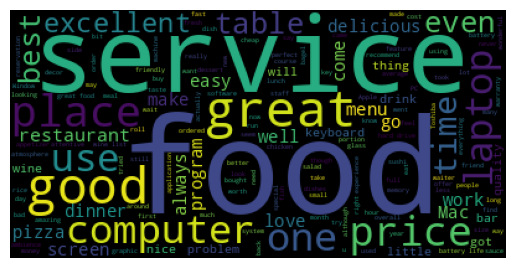

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
text3 = ' '.join(df['Sentence'])
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [8]:
train_df = df.drop(['id','from','to'], axis = 1)
train_df.drop(train_df[train_df.polarity == 'conflict'].index, inplace = True)
train_df

,Sentence,Aspect Term,polarity
0,But the staff was so horrible to us.,staff,0
1,"To be completely fair, the only redeeming fact...",food,1
2,"The food is uniformly exceptional, with a very...",food,1
3,"The food is uniformly exceptional, with a very...",kitchen,1
4,"The food is uniformly exceptional, with a very...",menu,2
...,...,...,...
6045,We also use Paralles so we can run virtual mac...,Windows 7 Home Premium,2
6046,We also use Paralles so we can run virtual mac...,Windows Server Enterprise 2003,2
6047,We also use Paralles so we can run virtual mac...,Windows Server 2008 Enterprise,2
6049,"How Toshiba handles the repair seems to vary, ...",repair,1


In [9]:
## Verify if the dataframe contains any NAN Values
train_df['polarity'].value_counts()

polarity
1    3151
0    1671
2    1093
Name: count, dtype: int64

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
stop_words = stopwords.words('english')
stemmer = PorterStemmer()

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def process(text):
    text=re.sub(text_cleaning_re,' ',str(text).lower()).strip()
    tokens=[]
    for i in text.split():
        if i not in stop_words:
            tokens.append(stemmer.stem(i))
    return ' '.join(tokens)
train_df['Sentence']=train_df['Sentence'].map(lambda x:process(x))
train_df['Aspect Term']=train_df['Aspect Term'].map(lambda x:process(x))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
train_df

,Sentence,Aspect Term,polarity
0,staff horribl us,staff,0
1,complet fair redeem factor food averag make de...,food,1
2,food uniformli except capabl kitchen proudli w...,food,1
3,food uniformli except capabl kitchen proudli w...,kitchen,1
4,food uniformli except capabl kitchen proudli w...,menu,2
...,...,...,...
6045,also use paral run virtual machin window xp pr...,window 7 home premium,2
6046,also use paral run virtual machin window xp pr...,window server enterpris 2003,2
6047,also use paral run virtual machin window xp pr...,window server 2008 enterpris,2
6049,toshiba handl repair seem vari folk indic char...,repair,1


In [12]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.utils import shuffle

# Separate the dataset by polarity
polarity_0 = train_df[train_df['polarity'] == 0]
polarity_1 = train_df[train_df['polarity'] == 1]
polarity_2 = train_df[train_df['polarity'] == 2]

# Sample for the train set
train_0 = polarity_0.sample(n=1500, random_state=1)
train_1 = polarity_1.sample(n=1500, random_state=1)
train_2 = polarity_2.sample(n=1000, random_state=1)

# Sample for the test set
test_0 = polarity_0.drop(train_0.index).sample(n=105, random_state=1)
test_1 = polarity_1.drop(train_1.index).sample(n=105, random_state=1)
test_2 = polarity_2.drop(train_2.index).sample(n=90, random_state=1)

# Combine train and test sets
X_train = pd.concat([train_0, train_1, train_2], ignore_index=True)
X_test = pd.concat([test_0, test_1, test_2], ignore_index=True)

# Extract labels
y_train = X_train['polarity']
y_test = X_test['polarity']

# Shuffle the datasets
X_train = shuffle(X_train, random_state=1)
X_test = shuffle(X_test, random_state=1)

# Drop polarity column from features
X_train = X_train.drop(columns=['polarity'])
X_test = X_test.drop(columns=['polarity'])

# Verify lengths
print(f"Train set size: {len(X_train)}, Test set size: {len(X_test)}")
print(f"Train set counts:\n{y_train.value_counts()}")
print(f"Test set counts:\n{y_test.value_counts()}")


Train set size: 4000, Test set size: 300
Train set counts:
polarity
0    1500
1    1500
2    1000
Name: count, dtype: int64
Test set counts:
polarity
0    105
1    105
2     90
Name: count, dtype: int64


In [13]:
!pip install torch torch-geometric spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 98.6 MB/s eta 0:00:00:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [19]:
X_train

,Sentence,Aspect Term
200,sorli disapoint discov hp thought reput compan...,warrenti
1078,look like shred chees partli done still strip,shred chees
610,last time went waitress come back take order,waitress
2159,highli recommend visit restaur dinner drink,dinner
1169,also seem problem hard disc certain time windo...,hard disc
...,...,...
3839,food ambianc servic agre previou review wait w...,servic
1096,overal poor featur averag perform poor batteri...,valu
3980,went df valentin day dinner,valentin day dinner
235,good luck get tabl,get tabl


In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

In [16]:
import nltk
from nltk.corpus import wordnet as wn

# Download WordNet data
nltk.download('wordnet')
nltk.download('omw-1.4')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
# WordNetDataset class remains unchanged
#dataset = WordNetDataset()


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_d

In [17]:
import torch
import nltk
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Embedding
from torch.utils.data import Dataset, DataLoader
from nltk import download
#nltk.download('wordnet2022')
#from nltk.corpus import wordnet
import random
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: WordNet Dataset Preparation
class WordNetDataset(Dataset):
    def __init__(self):
        self.triples = []
        self.entity_to_id = {}
        self.relation_to_id = {}

        # Prepare entities and relations from WordNet
        entities = set()
        relations = {"hypernym", "hyponym", "meronym", "holonym"}

        for synset in wn.all_synsets():
            entities.add(synset.name())
            for hypernym in synset.hypernyms():
                self.triples.append((synset.name(), "hypernym", hypernym.name()))
                entities.add(hypernym.name())
            for hyponym in synset.hyponyms():
                self.triples.append((synset.name(), "hyponym", hyponym.name()))
                entities.add(hyponym.name())
            for meronym in synset.part_meronyms():
                self.triples.append((synset.name(), "meronym", meronym.name()))
                entities.add(meronym.name())
            for holonym in synset.member_holonyms():
                self.triples.append((synset.name(), "holonym", holonym.name()))
                entities.add(holonym.name())

        # Map entities and relations to IDs
        self.entity_to_id = {entity: i for i, entity in enumerate(entities)}
        self.relation_to_id = {relation: i for i, relation in enumerate(relations)}

        # Convert triples to ID format
        self.triples = [
            (
                self.entity_to_id[head],
                self.relation_to_id[relation],
                self.entity_to_id[tail],
            )
            for head, relation, tail in self.triples
        ]

    def __len__(self):
        return len(self.triples)

    def __getitem__(self, idx):
        return self.triples[idx]


# Step 2: Knowledge Graph Embedding Model (DistMult)
class KGEModel(nn.Module):
    def __init__(self, num_nodes, num_relations, hidden_channels):
        super().__init__()
        self.num_nodes = num_nodes
        self.num_relations = num_relations
        self.hidden_channels = hidden_channels

        self.node_emb = Embedding(num_nodes, hidden_channels).to(device)
        self.rel_emb = Embedding(num_relations, hidden_channels).to(device)

    def forward(self, head_index, rel_type, tail_index):
        head = self.node_emb(head_index)
        rel = self.rel_emb(rel_type)
        tail = self.node_emb(tail_index)
        return (head * rel * tail).sum(dim=-1)

    def loss(self, head_index, rel_type, tail_index):
        pos_score = self(head_index, rel_type, tail_index)
        neg_sample = self.random_sample(head_index, rel_type, tail_index)
        neg_score = self(*neg_sample)

        return F.margin_ranking_loss(
            pos_score,
            neg_score,
            target=torch.ones_like(pos_score).to(device),
            margin=1.0,
        )

    def random_sample(self, head_index, rel_type, tail_index):
        corrupt_head = torch.randint(0, self.num_nodes, head_index.size(),device=device)
        corrupt_tail = torch.randint(0, self.num_nodes, tail_index.size(),device=device)

        if random.random() > 0.5:
            return corrupt_head, rel_type, tail_index
        else:
            return head_index, rel_type, corrupt_tail


# Step 3: Dot-Product Attention Layer
class AttentionLayer(nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.hidden_channels = hidden_channels
        self.attention_weights = nn.Linear(hidden_channels, 1).to(device)

    def forward(self, embeddings):
        scores = self.attention_weights(embeddings).squeeze(-1)  # Compute scores
        attention_weights = F.softmax(scores, dim=0)  # Normalize scores
        refined_embeddings = (attention_weights.unsqueeze(-1) * embeddings).sum(
            dim=0
        )  # Weighted sum
        return refined_embeddings, attention_weights


# Step 4: Full Architecture Combining KGE + Attention
class KnowledgeModel(nn.Module):
    def __init__(self, num_nodes, num_relations, hidden_channels):
        super().__init__()
        self.kge = KGEModel(num_nodes, num_relations, hidden_channels)
        self.attention = AttentionLayer(hidden_channels)

    def forward(self, head_index, rel_type, tail_index):
        embeddings = self.kge.node_emb.weight  # Extract all node embeddings
        refined_embeddings, attention_weights = self.attention(embeddings)
        return refined_embeddings, attention_weights


# Step 5: Training the Model
def train_model(dataset, hidden_channels=128, epochs=50, batch_size=128):
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    model = KnowledgeModel(
        num_nodes=len(dataset.entity_to_id),
        num_relations=len(dataset.relation_to_id),
        hidden_channels=hidden_channels,
    ).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        total_loss = 0
        for batch in dataloader:
            head_index, rel_type, tail_index = [b.to(device) for b in batch]
            optimizer.zero_grad()
            loss = model.kge.loss(head_index, rel_type, tail_index)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}, Loss: {total_loss:.4f}")

    return model


# Step 6: Generate Refined Embeddings Rk
def generate_rk(model):
    with torch.no_grad():
        refined_embeddings, attention_weights = model(
            torch.tensor([]).to(device), torch.tensor([]).to(device), torch.tensor([]).to(device)
        )  # Pass dummy values since embeddings are pre-computed
    return refined_embeddings, attention_weights



dataset = WordNetDataset()

# Train the model
model = train_model(dataset)

# Generate refined embeddings Rk
rk, attention_weights = generate_rk(model)

# Output
print("Refined Embeddings (Rk):", rk, rk.shape)
print("Attention Weights:", attention_weights)


Epoch 1, Loss: 8149.7973
Epoch 2, Loss: 3654.3240
Epoch 3, Loss: 1790.3868
Epoch 4, Loss: 1481.8384
Epoch 5, Loss: 1209.0084
Epoch 6, Loss: 942.9092
Epoch 7, Loss: 721.3252
Epoch 8, Loss: 555.2540
Epoch 9, Loss: 428.1170
Epoch 10, Loss: 338.4171
Epoch 11, Loss: 272.1180
Epoch 12, Loss: 225.9541
Epoch 13, Loss: 188.9067
Epoch 14, Loss: 161.3865
Epoch 15, Loss: 140.2735
Epoch 16, Loss: 122.8664
Epoch 17, Loss: 112.3384
Epoch 18, Loss: 100.1512
Epoch 19, Loss: 89.7763
Epoch 20, Loss: 81.7745
Epoch 21, Loss: 74.4503
Epoch 22, Loss: 70.8006
Epoch 23, Loss: 64.6709
Epoch 24, Loss: 59.4412
Epoch 25, Loss: 57.3536
Epoch 26, Loss: 52.2908
Epoch 27, Loss: 50.0204
Epoch 28, Loss: 47.2550
Epoch 29, Loss: 45.2257
Epoch 30, Loss: 43.1871
Epoch 31, Loss: 39.8058
Epoch 32, Loss: 40.0048
Epoch 33, Loss: 38.3531
Epoch 34, Loss: 35.7756
Epoch 35, Loss: 34.8415
Epoch 36, Loss: 32.0192
Epoch 37, Loss: 31.9966
Epoch 38, Loss: 30.5909
Epoch 39, Loss: 29.9284
Epoch 40, Loss: 29.6049
Epoch 41, Loss: 26.7886
Ep

In [37]:
import gc
torch.cuda.empty_cache()
gc.collect()

0

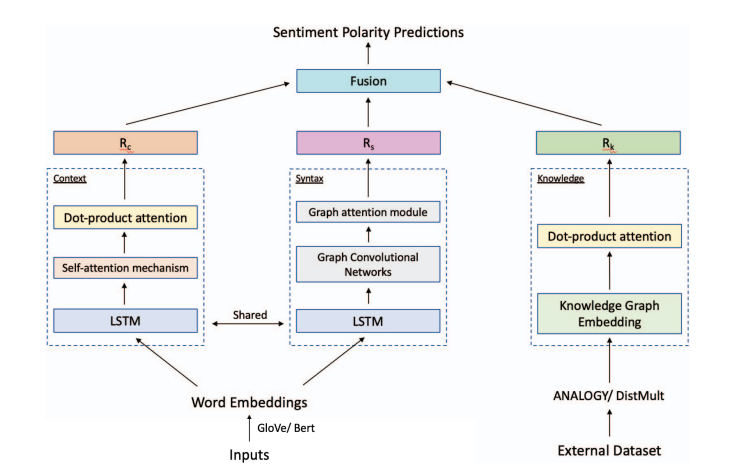
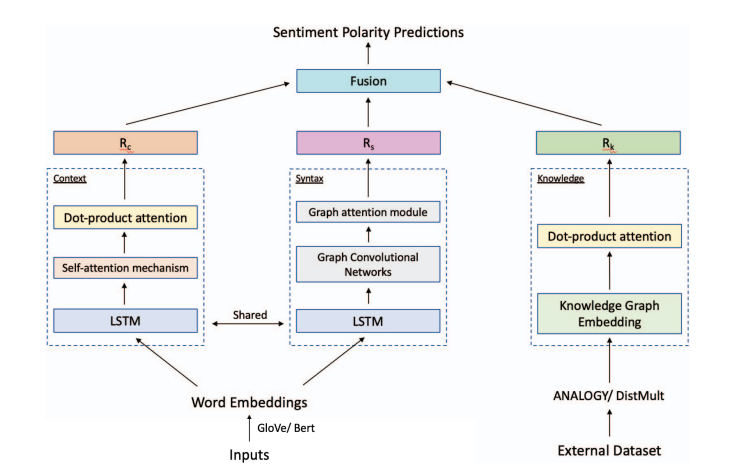

* **Word embedding embeds each word, wi, within a vector space E ∈ R(|V |×dw) where |V | refers to the dataset vocabulary and dw refers to the word embedding dimension. We further encoded the relative position feature to take advantage of the positional information of aspect, entity and context words.We leveraged two LSTMs to learn the relationship between the aspect and entity in each individual sentence. Additionally, two attention mechanisms were used to identify aspect-specific contextual information. The first attention mechanism learns any long-range dependencies of the contextual information while the second attention mechanism learns the weight of each aspect before aggregating the different weights to obtain the contextual representation of each aspect Rc.**
* To leverage syntactic information, we utilized the same LSTM and pretrained word embedding that was used in the context section to obtain the hidden state vectors. We used the hidden state vectors as input for a 2-layer GCN to capture the important syntactic information. We used Spacy1 to construct the syntactic dependency tree and obtain the adjacency matrix of each word. Furthermore, we employed a graph-based attention mechanism to learn syntaxaware representations of each aspect by masking the nonaspect words with zeroes. We then used a dot-product attention mechanism to syntactically capture the relationships of the aspects and respective opinions.
* **For our external knowledge base, we utilized WordNet. we instead used semantic matching approaches, such as ANALOGY and DistMult, to model the semantic relations into knowledge graph embeddings. To reduce noise, we concatenated the embeddings with hidden state vectors. An attention mechanism is also leveraged to capture relevant semantic features as knowledge representations for the various aspects.**
* From the Context, Knowledge, and Syntax sections, we obtain the respective representations Rc, Rk, Rs. To fully utilizethe representations, we first concatenate the representations in a pairwise manner, i.e., Rc + Rs; Rc + Rk; Rk + Rs to obtain sentiment features Rcs, Rck, Rks respectively. We then feed these features into a three-by-three convolution layer to obtain the predicted sentiment which is ultimately used in the loss function to train and optimize the model.

In [26]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel
from torch.nn.utils.rnn import pad_sequence  # Import for padding

# Load model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to("cuda")

def compute_positional_weights(input_ids, aspect_terms, tokenizer, gamma=0.1):
    """Computes distance-based positional weights for each token in the sentence."""
    batch_size, seq_len = input_ids.shape
    weights = torch.ones(batch_size, seq_len, device=input_ids.device)

    for i in range(batch_size):
        tokens = tokenizer.convert_ids_to_tokens(input_ids[i].tolist())
        aspect_tokens = tokenizer.tokenize(aspect_terms[i])  # Tokenized aspect term
        aspect_indices = [idx for idx, tok in enumerate(tokens) if tok in aspect_tokens]

        if aspect_indices:
            aspect_index = sum(aspect_indices) // len(aspect_indices)  # Average position
            distances = torch.abs(torch.arange(seq_len, device=input_ids.device) - aspect_index)
            weights[i] = torch.exp(-gamma * distances.float())  # Exponential decay

    return weights  # Shape: (batch_size, seq_len)

def get_embeddings_with_aspects(model, tokenizer, texts, aspect_terms, batch_size=32):
    """Computes contextualized sentence embeddings with aspect-aware positional weights."""
    embeddings = []
    aspect_embeddings = []
    device = "cuda" if torch.cuda.is_available() else "cpu"

    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        batch_aspects = aspect_terms[i:i + batch_size]

        encoded = tokenizer(batch, padding=True, truncation=True, return_tensors='pt').to(device)
        input_ids = encoded["input_ids"]

        with torch.no_grad():
            output = model(**encoded)
            sentence_embedding = output.last_hidden_state  # Shape: (batch, seq_len, hidden_dim)

        # Compute aspect-aware positional weights
        weights = compute_positional_weights(input_ids, batch_aspects, tokenizer)
        weights = weights.unsqueeze(-1)  # Shape: (batch, seq_len, 1)

        # Apply weights to embeddings
        weighted_embedding = sentence_embedding * weights  # Shape: (batch, seq_len, hidden_dim)

        embeddings.extend(weighted_embedding.cpu().unbind(0))  # Unbind to handle varying seq_len

        # Process aspect embeddings separately
        aspect_encoded = tokenizer(batch_aspects, padding=True, truncation=True, return_tensors='pt').to(device)
        with torch.no_grad():
            aspect_output = model(**aspect_encoded)
            aspect_emb = aspect_output.last_hidden_state[:, 0, :]  # Extract CLS token embeddings

        aspect_embeddings.append(aspect_emb.cpu())

    # Fix: Pad embeddings properly
    max_seq_len = max(e.shape[0] for e in embeddings)  # Get max sequence length
    hidden_dim = embeddings[0].shape[1]  # Get hidden dimension size

    padded_embeddings = torch.zeros(len(embeddings), max_seq_len, hidden_dim)  # Create zero tensor
    for i, emb in enumerate(embeddings):
        padded_embeddings[i, :emb.shape[0], :] = emb  # Copy actual embeddings

    # Stack aspect embeddings
    aspect_embeddings = torch.cat(aspect_embeddings, dim=0)  # Shape: (batch, hidden_dim)

    return padded_embeddings, aspect_embeddings

# Assuming X_train is a DataFrame with 'Sentence' and 'Aspect Term' columns
df = X_train
texts = df['Sentence'].tolist()
aspect_terms = df['Aspect Term'].tolist()

sentence_embeddings, aspect_embeddings = get_embeddings_with_aspects(model, tokenizer, texts, aspect_terms)

print("Sentence Embeddings:", sentence_embeddings.shape)  # Expected: (batch, max_seq_len, hidden_dim)
print("Aspect Embeddings:", aspect_embeddings.shape)  # Expected: (batch, hidden_dim)


Sentence Embeddings: torch.Size([4000, 65, 768])
Aspect Embeddings: torch.Size([4000, 768])


In [30]:
import spacy
import numpy as np
import torch

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

def get_adjacency_matrix(sentence):
    """
    Generates an adjacency matrix for a single sentence based on dependency parsing.
    
    Args:
        sentence (str): The input sentence.
    
    Returns:
        adj_matrix (np.ndarray): Adjacency matrix as a NumPy array.
        tokens (list): List of token strings in the sentence.
    """
    doc = nlp(sentence)
    num_tokens = len(doc)
    adj_matrix = np.zeros((num_tokens, num_tokens), dtype=np.float32)
    
    for token in doc:
        for child in token.children:
            adj_matrix[token.i, child.i] = 1
            adj_matrix[child.i, token.i] = 1

    return adj_matrix, [token.text for token in doc]

def pad_adjacency_matrices(adj_matrices, max_len):
    """
    Pads all adjacency matrices to the same size (max_len x max_len).
    
    Args:
        adj_matrices (list): List of adjacency matrices (NumPy arrays).
        max_len (int): The maximum length of tokens across all sentences.
    
    Returns:
        padded_matrices (torch.Tensor): A tensor of padded adjacency matrices.
    """
    padded_matrices = []
    for matrix in adj_matrices:
        padded = np.zeros((max_len, max_len), dtype=np.float32)
        original_size = matrix.shape[0]
        padded[:original_size, :original_size] = matrix
        padded_matrices.append(padded)
    return torch.tensor(padded_matrices, dtype=torch.float32)

def generate_adjacency_matrices(sentences):
    """
    Generates padded adjacency matrices and token lists for a list of sentences.
    
    Args:
        sentences (list): List of input sentences.
    
    Returns:
        padded_matrices (torch.Tensor): Tensor of padded adjacency matrices.
        token_lists (list): List of token strings for each sentence.
    """
    adj_matrices = []
    token_lists = []
    max_len = 0

    # Generate adjacency matrices and tokens
    for sentence in sentences:
        adj_matrix, tokens = get_adjacency_matrix(sentence)
        adj_matrices.append(adj_matrix)
        token_lists.append(tokens)
        max_len = max(max_len, len(tokens))  # Update max length

    # Pad adjacency matrices
    padded_matrices = pad_adjacency_matrices(adj_matrices, 65)

    return padded_matrices, token_lists

adj_matrices, token_lists = generate_adjacency_matrices(texts)

# Example: Access adjacency matrix and tokens for the first sentence
print("Adjacency Matrix for Sentence 1:")
print(adj_matrices[0])  # PyTorch tensor
print("Tokens for Sentence 1:")
print(token_lists[0])  # List of tokens
len(adj_matrices[0])

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Adjacency Matrix for Sentence 1:
tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Tokens for Sentence 1:
['sorli', 'disapoint', 'discov', 'hp', 'thought', 'reput', 'compani', 'honor', 'warrenti', 'fan', 'blade', 'fell', 'apart']


65

In [31]:
adj_matrices[0]

tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [32]:
from transformers import BertTokenizer
def get_aspect_indices(sentence_tokens, aspect_tokens):
    """
    Get the start and end indices of aspect tokens within the sentence tokens.
    
    Args:
        sentence_tokens (list of list of str): Tokenized sentences [batch_size, seq_len].
        aspect_tokens (list of list of str): Tokenized aspect terms [batch_size, aspect_len].

    Returns:
        list of tuples: Each tuple contains (start_index, end_index) for the aspect in the corresponding sentence.
                        If not found, returns (-1, -1).
    """
    indices = []
    for i, sentence in enumerate(sentence_tokens):
        aspect = aspect_tokens[i]
        aspect_length = len(aspect)
        found = False

        # Find the position of the aspect tokens in the sentence
        for j in range(len(sentence) - aspect_length + 1):
            if sentence[j:j + aspect_length] == aspect:
                indices.append((j, j + aspect_length))  # Start and end indices
                found = True
                break
        
        # If the aspect is not found, append a placeholder
        if not found:
            indices.append((-1, -1))
    
    return indices
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')

# Example usage
sentence_tokens = [tokenizer.tokenize(sent) for sent in texts]
aspect_tokens = [tokenizer.tokenize(asp) for asp in aspect_terms]

# Get aspect indices for the batch
aspect_indices = get_aspect_indices(sentence_tokens, aspect_tokens)

# Print aspect indices
print("Aspect Indices:", len(aspect_indices))  # [batch_size]


Aspect Indices: 4000


In [39]:
# Assuming your data is in numpy arrays or lists
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Convert to PyTorch tensors
sentence_embeddings = torch.tensor(sentence_embeddings, dtype=torch.float32).to(device)  # Shape: [batch_size, seq_len, input_dim]
aspect_embeddings = torch.tensor(aspect_embeddings, dtype=torch.float32).to(device)  # Shape: [batch_size, input_dim]
adj_matrices = torch.tensor(adj_matrices, dtype=torch.float32).to(device)  # Shape: [batch_size, seq_len, seq_len]
aspect_indices=torch.tensor(aspect_indices).to(device)
y_train=torch.tensor(y_train).to(device)
 # Shape: [batch_size]
print(sentence_embeddings.shape,aspect_embeddings.shape,aspect_indices.shape, adj_matrices.shape)

torch.Size([4000, 65, 768]) torch.Size([4000, 768]) torch.Size([4000, 2]) torch.Size([4000, 65, 65])


<ipython-input-39-b717e9d4a39b>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sentence_embeddings = torch.tensor(sentence_embeddings, dtype=torch.float32).to(device)  # Shape: [batch_size, seq_len, input_dim]
<ipython-input-39-b717e9d4a39b>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  aspect_embeddings = torch.tensor(aspect_embeddings, dtype=torch.float32).to(device)  # Shape: [batch_size, input_dim]
<ipython-input-39-b717e9d4a39b>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  adj_matrices = torch.tensor(adj_matrices, dtype=torc

* Specifically, we changed how the distance is calculated between each word token and the sentiment by taking the shortest distance of each term to the left-most or right-most polarity term.
* **the proposed model incorporates critical components, including an Optimizer (AdamW), Learning Rate Scheduler, Weight Initializer, and Non-Linear Activation Function, to augment the performance of the ABSA task.**
* Xavier initialization slightly outperformed Kaiming initialization in terms of accuracy, however, Kaiming initialization was able to achieve a higher F1 score. Interestingly, using Leaky ReLU as the non-linearity function.

In [40]:
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv, GATConv
import torch.optim as optim
from torch_geometric.utils import dense_to_sparse, add_self_loops

class ABSAContextSyntaxModel(nn.Module):
    def __init__(self, input_dim, lstm_hidden_dim, gcn_hidden_dim, attention_dim, num_classes):
        super(ABSAContextSyntaxModel, self).__init__()

        # LSTM for context modeling
        self.aspect_entity_lstm = nn.LSTM(input_dim, lstm_hidden_dim, batch_first=True, bidirectional=True)
        self.context_lstm = nn.LSTM(2 * lstm_hidden_dim, lstm_hidden_dim, batch_first=True, bidirectional=True)

        # Attention for context (aspect-aware)
        self.attention_long_range = nn.Linear(2 * lstm_hidden_dim, attention_dim)
        self.attention_long_range_weight = nn.Linear(attention_dim, 1)
        self.attention_aspect_weight = nn.Linear(2 * lstm_hidden_dim, 1)

        self.conv = nn.Conv1d(in_channels=3, out_channels=1, kernel_size=3, stride=1, padding=1)

        # GCN for syntax modeling
        self.gcn1 = GCNConv(2 * lstm_hidden_dim, gcn_hidden_dim)
        self.gcn2 = GCNConv(gcn_hidden_dim, gcn_hidden_dim)
        self.gat = GATConv(gcn_hidden_dim, gcn_hidden_dim) 
        self.aspect_projection = nn.Linear(input_dim, gcn_hidden_dim)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)
        # Fully connected layer for final output
        self.fc = nn.Linear(gcn_hidden_dim*2, num_classes) 
        
        self.initialize_weights(init_type="xavier")  # Change to "kaiming" if needed

    def initialize_weights(self, init_type="xavier"):
        for m in self.modules():
            if isinstance(m, (nn.Linear, nn.Conv1d)):
                if init_type == "xavier":
                    nn.init.xavier_uniform_(m.weight)
                elif init_type == "kaiming":
                    nn.init.kaiming_uniform_(m.weight, nonlinearity="leaky_relu")
                if m.bias is not None:
                    nn.init.zeros_(m.bias)


    def relative_position_encoding(self, sentence_embeddings, aspect_indices):
        batch_size, seq_len, embedding_dim = sentence_embeddings.size()

        # Ensure aspect_indices has the correct shape: [batch_size]
        aspect_indices = aspect_indices[:, 0]  # Use only the first aspect index for each sentence

        # Create a position matrix: [batch_size, seq_len]
        positions = torch.arange(seq_len, device=sentence_embeddings.device).unsqueeze(0)
        positions = positions.expand(batch_size, seq_len)

        # Subtract aspect indices and take absolute values
        position_matrix = torch.abs(positions - aspect_indices.unsqueeze(1))

        # Create positional features: [batch_size, seq_len, embedding_dim]
        position_features = embedding_dim - position_matrix.unsqueeze(-1)
        position_features = position_features.float() / embedding_dim  # Normalize to [0, 1]

        # Add positional features to the sentence embeddings
        updated_sentence_embeddings = sentence_embeddings + position_features
        return updated_sentence_embeddings

    def attention(self, features, attention_layer, weight_layer):
        attention_scores = torch.tanh(attention_layer(features))
        attention_weights = torch.softmax(weight_layer(attention_scores), dim=1)
        weighted_output = torch.sum(attention_weights * features, dim=1)
        return weighted_output

    def dot_attention(self, gcn_out, aspect_embedding, mask):
        projected_aspect_embedding = self.aspect_projection(aspect_embedding)
        attention_scores = torch.matmul(gcn_out, projected_aspect_embedding.unsqueeze(-1)).squeeze(-1)
        attention_scores = attention_scores * mask
        attention_weights = torch.softmax(attention_scores, dim=0)
        syntax_representation = torch.matmul(attention_weights.unsqueeze(0), gcn_out)
        return syntax_representation.squeeze(0)

    def forward(self, sentence_embeddings, aspect_embeddings, adj_matrices, aspect_indices,rk):
        sentence_embeddings = self.relative_position_encoding(sentence_embeddings, aspect_indices)

        # Context modeling (LSTM + Aspect-specific Attention)
        aspect_entity_lstm_out, _ = self.aspect_entity_lstm(sentence_embeddings)
        context_lstm_out, _ = self.context_lstm(aspect_entity_lstm_out)

        long_range_representation = self.attention(context_lstm_out, self.attention_long_range, self.attention_long_range_weight)
        aspect_specific_weights = torch.softmax(self.attention_aspect_weight(context_lstm_out), dim=1)
        rc = torch.sum(aspect_specific_weights * context_lstm_out, dim=1)

        batch_syntax_representations = []
        for i in range(len(adj_matrices)):
            lstm_hidden_states = aspect_entity_lstm_out[i]  # Shape: (seq_len, lstm_hidden_dim*2)
        
            edge_index, edge_weight = dense_to_sparse(adj_matrices[i])  # Convert adjacency matrix to edge list
            edge_index, edge_weight = add_self_loops(edge_index, edge_weight)  # Add self-loops for stability
        
            gcn_out1 = self.leaky_relu(self.gcn1(lstm_hidden_states, edge_index, edge_weight))
            gcn_out1 = gcn_out1 + lstm_hidden_states  # Residual connection
    
            # Second GCN Layer
            gcn_out2 = self.leaky_relu(self.gcn2(gcn_out1, edge_index, edge_weight))
            gcn_out2 = gcn_out2 + gcn_out1  # Residual connection

            # Graph Attention Layer (GAT)
            gcn_out3 = self.leaky_relu(self.gat(gcn_out2, edge_index))  
        
            # Ensure proper masking for aspect words
            mask = torch.zeros(lstm_hidden_states.shape[0], device=lstm_hidden_states.device)  # Shape: (seq_len)
            start_idx, end_idx = aspect_indices[i]  # Get aspect word indices
            mask[start_idx:end_idx] = 1  # Mask aspect words
        
            syntax_representation = self.dot_attention(gcn_out3, aspect_embeddings[i], mask)
            batch_syntax_representations.append(syntax_representation)
        
        rs = torch.stack(batch_syntax_representations, dim=0)  # Stack batch syntax representations

        rk = rk.unsqueeze(0).expand(sentence_embeddings.size(0), -1)

        rcs = torch.cat([rc, rs], dim=-1)
        rck = torch.cat([rc, rk], dim=-1)
        rks = torch.cat([rk, rs], dim=-1)

        features = torch.stack([rcs, rck, rks], dim=1)
        #features = features.transpose(1, 2)  # Shape: (batch_size, combined_dim, 3)

        output = self.conv(features)

        predicted_sentiment = output.squeeze(-1).squeeze(1)
        final_output = self.fc(predicted_sentiment)

        return final_output

# Dummy data for testing
batch_size = 8
seq_len = 65
input_dim = 768
lstm_hidden_dim = 64
gcn_hidden_dim = 128
attention_dim = 64
num_classes = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ABSAContextSyntaxModel(input_dim, lstm_hidden_dim, gcn_hidden_dim, attention_dim, num_classes).to(device)

# Optimizer and Learning Rate Scheduler
optimizer = optim.AdamW(model.parameters(), lr=0.0003, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.6)

# Training loop
num_epochs = 50
criterion = nn.CrossEntropyLoss()
scaler = torch.cuda.amp.GradScaler()

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    with torch.cuda.amp.autocast():
        logits = model(sentence_embeddings, aspect_embeddings, adj_matrices, aspect_indices, rk)
        loss = criterion(logits, y_train)

    scaler.scale(loss).backward()
    scaler.step(optimizer)
    scaler.update()
    scheduler.step()

    _, predicted = torch.max(logits, dim=1)
    correct = (predicted == y_train).sum().item()
    total = y_train.size(0)
    accuracy = correct / total

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy * 100:.2f}%")

<ipython-input-40-f01ae1620d7a>:152: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
<ipython-input-40-f01ae1620d7a>:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch [1/50], Loss: 1.2168, Accuracy: 25.00%
Epoch [2/50], Loss: 1.0857, Accuracy: 37.50%
Epoch [3/50], Loss: 1.1072, Accuracy: 37.52%
Epoch [4/50], Loss: 1.0980, Accuracy: 37.70%
Epoch [5/50], Loss: 1.0860, Accuracy: 37.38%
Epoch [6/50], Loss: 1.0866, Accuracy: 37.50%
Epoch [7/50], Loss: 1.0877, Accuracy: 37.50%
Epoch [8/50], Loss: 1.0859, Accuracy: 37.45%
Epoch [9/50], Loss: 1.0848, Accuracy: 37.57%
Epoch [10/50], Loss: 1.0843, Accuracy: 37.55%
Epoch [11/50], Loss: 1.0834, Accuracy: 37.65%
Epoch [12/50], Loss: 1.0828, Accuracy: 38.12%
Epoch [13/50], Loss: 1.0831, Accuracy: 37.48%
Epoch [14/50], Loss: 1.0838, Accuracy: 37.55%
Epoch [15/50], Loss: 1.0836, Accuracy: 37.57%
Epoch [16/50], Loss: 1.0825, Accuracy: 37.60%
Epoch [17/50], Loss: 1.0816, Accuracy: 37.80%
Epoch [18/50], Loss: 1.0815, Accuracy: 38.30%
Epoch [19/50], Loss: 1.0819, Accuracy: 38.50%
Epoch [20/50], Loss: 1.0820, Accuracy: 38.48%
Epoch [21/50], Loss: 1.0813, Accuracy: 38.77%
Epoch [22/50], Loss: 1.0809, Accuracy: 38.6